TESS Quick-Look Light Curves:
(http://archive.stsci.edu/hlsp/qlp)

In [92]:
import numpy as np
import pandas as pd

import os

#datapath = '~/TESS/s0026'

#toi_catalog = pd.read_csv(os.path.join(datapath,'csv-file-toi-catalog.csv'), skiprows=4, index_col='TIC')

toi_catalog = pd.read_csv('https://tev.mit.edu/toi/toi-release', skiprows=4, index_col='TIC')
toi_catalog.index.rename('TIC_ID', inplace=True)

target_s26 = pd.read_csv('https://archive.stsci.edu/hlsps/qlp/target_lists/s0026.csv')
target_s26.rename({'#TIC_ID':'TIC_ID'}, axis='columns', inplace=True)
target_s26.set_index('TIC_ID',inplace=True)

s26_toi = toi_catalog.join(target_s26, how='inner')

hlsp_qlp_tess_ffi_s0026-0000000157586003_tess_v01_llc.fits

In [3]:
import os

def id_to_fname(id, data_dir = '~/TESS', ext='.fits', sector='s0026', fprefix = 'hlsp_qlp_tess_ffi_', fsuffix='_tess_v01_llc'):
    myid = id
    root = '0000'
    frags = []
    i=0
    while i < 3:
        frags.append(myid % 10000)
        myid = myid//10000
        i += 1
    frags.append(0)
    frags.reverse()
    dirnames =  [str(i).zfill(4) for i in frags]
    dirroot = os.path.join(data_dir, sector)
    dirpath = os.path.join(dirroot, os.sep.join(dirnames))

    fname = fprefix+sector+'-'+''.join(dirnames)+fsuffix+ext


    return os.path.expanduser(os.path.join(dirpath, fname))



In [6]:
fname = id_to_fname(157586003)


In [7]:
from astropy.io import fits

In [8]:
xx = fits.getdata(fname, header=True, ext=1)

In [9]:
xx[1]

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   56 / length of dimension 1                          
NAXIS2  =                 1148 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   13 / number of table fields                         
TTYPE1  = 'TIME    '                                                            
TFORM1  = 'D       '                                                            
TUNIT1  = 'BJD-2457000, days'                                                   
TTYPE2  = 'CADENCENO'                                                           
TFORM2  = 'J       '        

In [10]:
s26_toi

,Parameter Source Pipeline,Detection Pipeline(s),Full TOI ID,TOI Disposition,TIC Right Ascension,TIC Declination,TIC Right Ascension 2015.5,TIC Declination 2015.5,TMag Value,TMag Uncertainty,...,TFOP SG1a,TFOP SG1b,TFOP SG2,TFOP SG3,TFOP SG4,TFOP SG5,Alerted,Updated,RA,DEC
TIC_ID,,,,,,,,,,,,,,,,,,,,,
7548817,spoc-s40-b0A,CTOI,2583.01,PC,272.266982,45.336878,272.267029,45.336900,12.0450,0.0060,...,4,3,3,4,4,4,2021-03-18 22:24:57+00,2021-11-22 19:19:09+00,272.266982,45.336878
8516795,qlp-s26-ffi,QLP,2169.01,PC,279.170086,23.258752,279.170112,23.258619,10.5530,0.0060,...,4,3,3,4,4,4,2020-08-10 17:26:49+00,2020-08-10 17:26:49+00,279.170086,23.258752
8599009,qlp-s40-ffi,QLP,4463.01,PC,279.358152,18.729734,279.358129,18.729952,10.4670,0.0060,...,4,3,3,4,4,4,2021-09-09 19:55:02+00,2021-09-09 14:21:03+00,279.358152,18.729734
9828416,qlp-s25-ffi,QLP,2114.01,PC,261.096435,33.205086,261.096395,33.205073,9.8250,0.0070,...,4,3,3,4,4,4,2020-07-28 21:38:56+00,2020-07-28 21:38:56+00,261.096435,33.205086
21279791,spoc-s40-b0A,CTOI,2582.01,PC,277.291722,48.059961,277.291791,48.059938,12.4850,0.0060,...,4,3,3,4,4,4,2021-03-18 22:24:57+00,2021-11-22 19:18:34+00,277.291722,48.059961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716467085,qlp-s41-ffi,QLP,2149.01,PC,285.596430,42.507347,285.596508,42.507414,10.1100,0.0070,...,4,3,3,4,4,4,2020-08-10 17:26:48+00,2021-11-23 17:14:09+00,285.596430,42.507347
1717732429,qlp-s14-ffi,QLP,1172.01,PC,282.474534,55.266425,282.474539,55.266390,10.3020,0.0070,...,5,5,5,5,5,5,2019-08-27 16:09:24+00,2019-08-27 16:09:24+00,282.474534,55.266426
1718201850,qlp-s41-ffi,QLP,1351.01,EB,286.747137,71.712183,286.746549,71.712195,10.3270,0.0200,...,5,5,5,5,5,5,2019-10-30 21:47:36+00,2021-11-23 19:22:03+00,286.747137,71.712183


In [11]:
s26_toi.columns

Index(['Parameter Source Pipeline', 'Detection Pipeline(s)', 'Full TOI ID',
       'TOI Disposition', 'TIC Right Ascension', 'TIC Declination',
       'TIC Right Ascension 2015.5', 'TIC Declination 2015.5', 'TMag Value',
       'TMag Uncertainty', 'Epoch Value', 'Epoch Error',
       'Orbital Period Value', 'Orbital Period Error',
       'Transit Duration Value', 'Transit Duration Error',
       'Transit Depth Value', 'Transit Depth Error', 'Sectors',
       'Public Comment', 'Surface Gravity Value',
       'Surface Gravity Uncertainty', 'Signal ID', 'Star Radius Value',
       'Star Radius Error', 'Planet Radius Value', 'Planet Radius Error',
       'Planet Equilibrium Temperature (K) Value',
       'Effective Temperature Value', 'Effective Temperature Uncertainty',
       'Effective Stellar Flux Value', 'Signal-to-noise', 'Centroid Offset',
       'TFOP Master', 'TFOP SG1a', 'TFOP SG1b', 'TFOP SG2', 'TFOP SG3',
       'TFOP SG4', 'TFOP SG5', 'Alerted', 'Updated', 'RA', 'DEC'],
      

In [12]:
s26_toi.sort_values('Transit Depth Value', ascending=False)

,Parameter Source Pipeline,Detection Pipeline(s),Full TOI ID,TOI Disposition,TIC Right Ascension,TIC Declination,TIC Right Ascension 2015.5,TIC Declination 2015.5,TMag Value,TMag Uncertainty,...,TFOP SG1a,TFOP SG1b,TFOP SG2,TFOP SG3,TFOP SG4,TFOP SG5,Alerted,Updated,RA,DEC
TIC_ID,,,,,,,,,,,,,,,,,,,,,
420645189,spoc-s25-b0A,CTOI,1897.01,PC,48.369605,75.268316,48.370422,75.268379,10.13740,0.0060,...,4,3,3,4,4,4,2020-05-29 16:46:26+00,2020-10-07 16:06:35+00,48.369605,75.268316
237200747,qlp-s15-ffi,SPOC/QLP,1270.01,PC,293.032708,74.891133,293.032494,74.891073,11.46300,0.0060,...,5,5,5,5,5,5,2019-10-17 00:30:12+00,2019-10-17 00:30:12+00,293.032708,74.891133
23059280,spoc-s26-b02,SPOC,2137.01,PC,274.143862,34.173051,274.143956,34.173012,12.21860,0.0060,...,4,3,3,4,4,4,2020-08-07 21:59:54+00,2020-08-07 21:59:54+00,274.143862,34.173051
1551345500,spoc-s14s26-b0A,SPOC,1764.01,PC,277.291895,55.313152,277.293010,55.313107,11.20180,0.0064,...,4,3,3,4,4,4,2020-02-27 22:12:19+00,2020-09-23 12:24:51+00,277.291895,55.313152
198610218,spoc-s40-b02,SPOC,4432.01,PC,271.308164,47.911303,271.308219,47.911223,12.53860,0.0067,...,4,3,3,4,4,4,2021-09-09 19:53:44+00,2021-09-09 12:54:33+00,271.308164,47.911303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264303333,spoc-s14s26-b0H,SPOC,2250.01,PC,296.355299,67.311070,296.355007,67.310971,10.15830,0.0060,...,4,2,2,4,4,4,2020-09-23 20:39:01+00,2020-09-11 13:31:47+00,296.355299,67.311070
188768068,spoc-s14s26-b0A,SPOC,1462.01,PC,261.350233,52.790686,261.349585,52.790472,5.89610,0.0060,...,5,5,5,5,5,5,2019-12-05 16:42:06+00,2020-09-14 22:19:31+00,261.350233,52.790686
198457103,qlp-tois-update,QLP,1488.01,PC,261.921135,57.510498,261.921033,57.510557,8.07000,0.0060,...,4,2,2,4,4,4,2019-12-05 21:41:09+00,2020-05-20 19:59:02+00,261.921135,57.510498


In [25]:
TOIDisposition= { 'CP': 'Confirmed Planet',
                  'EB': 'Eclipsing Binary',
                  'IS': 'Instrumentation',
                  'KP': 'Known Planet',
                  'O':  'Other',
                  'V':  'Variable Star',
                  'PC': 'Planet Candidate'}

In [35]:
vc = pd.DataFrame(toi_catalog['TOI Disposition'].value_counts()).reset_index()
vc.rename({'index':'Disposition Code','TOI Disposition':'Nr. Records'},axis='columns',inplace=True)
vc['TOI Disposition'] = [TOIDisposition[d] for d in vc['Disposition Code']]

In [36]:
vc

,Disposition Code,Nr. Records,TOI Disposition
0,PC,4362,Status TBD
1,KP,354,Known Planet
2,EB,203,Eclipsing Binary
3,CP,104,Confirmed Planet
4,IS,7,Instrumentation
5,V,6,Variable Star
6,O,2,Other


In [28]:
id_to_fname(420645189)


'/home/kevin_leo_mcmanus/TESS/s0026/0000/0004/2064/5189/hlsp_qlp_tess_ffi_s0026-0000000420645189_tess_v01_llc.fits'

In [30]:
xx = fits.open(id_to_fname(420645189))

In [31]:
import pandas as pd
from astropy.table import Table
df = Table(xx[1].data).to_pandas().set_index('CADENCENO')
df

,TIME,SAP_FLUX,KSPSAP_FLUX,KSPSAP_FLUX_ERR,QUALITY,ORBITID,SAP_X,SAP_Y,SAP_BKG,SAP_BKG_ERR,KSPSAP_FLUX_SML,KSPSAP_FLUX_LAG
CADENCENO,,,,,,,,,,,,
37575,2010.278185,1.003927,1.001102,0.000424,4096,59,388.002930,1520.270264,-3031.830078,2604.030029,1.001682,1.001329
37576,2010.299019,1.005352,0.999362,0.000424,4096,59,388.002991,1520.268921,-3613.669922,2276.229980,0.999368,0.999844
37577,2010.319852,1.006330,1.000999,0.000424,4096,59,388.003357,1520.269531,-4379.870117,2814.350098,1.000525,1.001614
37578,2010.340686,1.003991,0.999946,0.000424,4096,59,388.001190,1520.268921,-4108.830078,2543.360107,0.999377,1.000183
37579,2010.361519,1.004112,0.999613,0.000424,4096,59,388.003632,1520.270264,-4259.790039,2286.580078,0.999311,0.999564
...,...,...,...,...,...,...,...,...,...,...,...,...
38763,2035.028593,0.997367,1.000314,0.000424,4096,60,388.031830,1520.328735,-597.760010,1463.689941,1.000466,1.000689
38764,2035.049427,0.998213,1.000141,0.000424,4096,60,388.031525,1520.328491,-940.770020,1526.130005,0.999975,1.000633
38765,2035.070261,0.997877,1.000652,0.000424,4096,60,388.032898,1520.329224,-598.500000,1494.530029,1.000596,1.001235


In [93]:
import matplotlib.pyplot as plt


(0.96, 1.02)

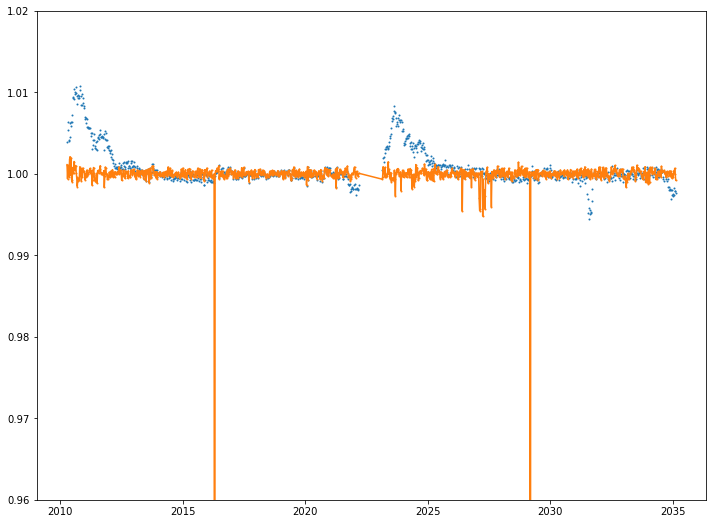

In [40]:
fig, ax = plt.subplots( figsize=(12,9))
ax.plot(df.TIME, df.SAP_FLUX, ls='None', marker='.', ms=2)
ax.plot(df.TIME, df.KSPSAP_FLUX, ls='-', marker='.', ms=2)
ax.set_ylim(0.96, 1.02)

In [41]:
df = Table(fits.getdata(id_to_fname(420645189),ext=1)).to_pandas().set_index('CADENCENO')

In [79]:
def plot_lightcurve(tic, ax,  ylim=(0.96,1.02)):
    fname = id_to_fname(tic)
    df = Table(fits.getdata(id_to_fname(tic),ext=1)).to_pandas().set_index('CADENCENO')

    ax.plot(df.index, df.SAP_FLUX, ls='None', marker='.', ms=2)
    ax.plot(df.index, df.SAP_FLUX)
    ax.set_ylim(ylim)


In [50]:
(s26_toi['Transit Duration Value']/s26_toi['Transit Duration Error']).sort_values()

TIC_ID
372757221       1.830896
48188920        1.921450
441739871       1.975854
459837008       2.129774
289164482       2.345761
                ...     
420645189     219.152392
233120979     219.245333
198588220     245.279816
138168780     282.608975
123495874    1950.000000
Length: 459, dtype: float64

In [1]:

fig, ax = plt.subplots( nrows=3, ncols=1, figsize=(12,9), sharex=True)
plot_lightcurve(198588220 , ax=ax[0])
plot_lightcurve(289164482, ax=ax[1])
plot_lightcurve(5114949, ax=ax[2])

NameError: name 'plt' is not defined

In [44]:
s26_toi.index[9]

23229805

In [63]:
target_s26.head()

,RA,DEC
TIC_ID,,
5114860,269.445338,13.543602
5114862,269.464058,13.544297
5114882,269.366255,13.562250
5114910,269.387283,13.579462
5114949,269.463735,13.604597


In [73]:
id_to_fname(5114949)


'/home/kevin_leo_mcmanus/TESS/s0026/0000/0000/0511/4949/hlsp_qlp_tess_ffi_s0026-0000000005114949_tess_v01_llc.fits'

In [84]:
s26_toi['TOI Disposition'].value_counts()

PC    423
KP     27
EB      7
IS      1
CP      1
Name: TOI Disposition, dtype: int64

In [83]:
s26_toi.columns

Index(['Parameter Source Pipeline', 'Detection Pipeline(s)', 'Full TOI ID',
       'TOI Disposition', 'TIC Right Ascension', 'TIC Declination',
       'TIC Right Ascension 2015.5', 'TIC Declination 2015.5', 'TMag Value',
       'TMag Uncertainty', 'Epoch Value', 'Epoch Error',
       'Orbital Period Value', 'Orbital Period Error',
       'Transit Duration Value', 'Transit Duration Error',
       'Transit Depth Value', 'Transit Depth Error', 'Sectors',
       'Public Comment', 'Surface Gravity Value',
       'Surface Gravity Uncertainty', 'Signal ID', 'Star Radius Value',
       'Star Radius Error', 'Planet Radius Value', 'Planet Radius Error',
       'Planet Equilibrium Temperature (K) Value',
       'Effective Temperature Value', 'Effective Temperature Uncertainty',
       'Effective Stellar Flux Value', 'Signal-to-noise', 'Centroid Offset',
       'TFOP Master', 'TFOP SG1a', 'TFOP SG1b', 'TFOP SG2', 'TFOP SG3',
       'TFOP SG4', 'TFOP SG5', 'Alerted', 'Updated', 'RA', 'DEC'],
      

In [85]:
# For the purposes of this tutorial, we just know the MAST URL location of the file we want to examine.
dvt_file = "https://archive.stsci.edu/missions/tess/tid/s0002/0000/0001/0010/0827/tess2018235142541-s0002-s0002-0000000100100827-00109_dvt.fits"

In [86]:
fits.info(dvt_file)

Filename: /home/kevin_leo_mcmanus/.astropy/cache/download/url/b7a964102cf8214206e44685a7596beb/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   ()      
  1  TCE_1         1 BinTableHDU     92   19737R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  2  TCE_2         1 BinTableHDU     92   19737R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  3  Statistics    1 BinTableHDU    157   19737R x 38C   [D, E, J, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


In [87]:
fits.getdata(dvt_file, ext=1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'PHASE'; format = 'E'; unit = 'days'; disp = 'E14.7'
    name = 'LC_INIT'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'LC_INIT_ERR'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'LC_WHITE'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'LC_DETREND'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'MODEL_INIT'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'MODEL_WHITE'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
)

In [88]:
with fits.open(dvt_file, mode="readonly") as hdulist:
    
    # Extract stellar parameters from the primary header.  We'll get the effective temperature, surface gravity,
    # and TESS magnitude.
    star_teff = hdulist[0].header['TEFF']
    star_logg = hdulist[0].header['LOGG']
    star_tmag = hdulist[0].header['TESSMAG']
    
    # Extract some of the fit parameters for the first TCE.  These are stored in the FITS header of the first
    # extension.
    period = hdulist[1].header['TPERIOD']
    duration = hdulist[1].header['TDUR']
    epoch = hdulist[1].header['TEPOCH']
    depth = hdulist[1].header['TDEPTH']
    
    # Extract some of the columns of interest for the first TCE signal.  These are stored in the binary FITS table
    # in the first extension.  We'll extract the timestamps in TBJD, phase, initial fluxes, and corresponding
    # model fluxes.
    times = hdulist[1].data['TIME']
    phases = hdulist[1].data['PHASE']
    fluxes_init = hdulist[1].data['LC_INIT']
    model_fluxes_init = hdulist[1].data['MODEL_INIT']

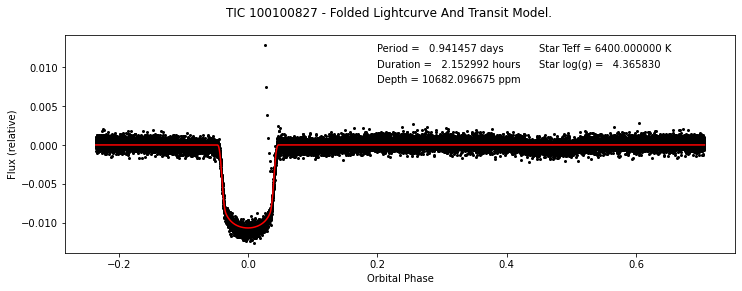

In [89]:
# First sort the phase and flux arrays by phase so we can draw the connecting lines between points.
sort_indexes = np.argsort(phases)

# Start figure and axis.
fig, ax = plt.subplots(figsize=(12,4))

# Plot the detrended fluxes as black circles.  We will plot them in sorted order.
ax.plot(phases[sort_indexes], fluxes_init[sort_indexes], 'ko',
       markersize=2)

# Plot the model fluxes as a red line.  We will plot them in sorted order so the line connects between points cleanly.
ax.plot(phases[sort_indexes], model_fluxes_init[sort_indexes], '-r')

# Let's label the axes and define a title for the figure.
fig.suptitle('TIC 100100827 - Folded Lightcurve And Transit Model.')
ax.set_ylabel("Flux (relative)")
ax.set_xlabel("Orbital Phase")

# Let's add some text in the top-right containing some of the fit parameters.
plt.text(0.2, 0.012, "Period = {0:10.6f} days".format(period))
plt.text(0.2, 0.010, "Duration = {0:10.6f} hours".format(duration))
plt.text(0.2, 0.008, "Depth = {0:10.6f} ppm".format(depth))
plt.text(0.45, 0.012, "Star Teff = {0:10.6f} K".format(star_teff))
plt.text(0.45, 0.010, "Star log(g) = {0:10.6f}".format(star_logg))

plt.show()

In [37]:
from astroquery.mast import Observations

In [38]:
     tic_ids = ['21278334', '7583207', '10000659566']
     obsTable = Observations.query_criteria(provenance_name="QLP",
                                       target_name=tic_ids,
                                       sequence_number=26)

In [76]:
obsTable

dataproduct_type,calib_level,obs_collection,obs_id,target_name,s_ra,s_dec,t_min,t_max,t_exptime,wavelength_region,filters,em_min,em_max,target_classification,obs_title,t_obs_release,instrument_name,proposal_pi,proposal_id,proposal_type,project,sequence_number,provenance_name,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,intentType,obsid,objID
str10,int64,str4,str53,str11,float64,float64,float64,float64,float64,str7,str4,float64,float64,str1,str1,float64,str10,str16,str3,str1,str4,int64,str3,str47,str1,str98,str6,bool,float64,str7,str8,str8
timeseries,4,HLSP,hlsp_qlp_tess_ffi_s0026-0000000021278334_tess_v01_llc,21278334,276.970433964,49.9165372927,59009.78310106,59034.61660425,1800.0,Optical,TESS,600.0,1000.0,--,--,59164.89659714,Photometer,Chelsea X. Huang,N/A,--,TESS,26,QLP,CIRCLE ICRS 276.97043396 49.91653729 0.00111111,--,mast:HLSP/qlp/s0026/0000/0000/2127/8334/hlsp_qlp_tess_ffi_s0026-0000000021278334_tess_v01_llc.fits,PUBLIC,False,nan,science,32967208,76908810
timeseries,4,HLSP,hlsp_qlp_tess_ffi_s0026-0000000007583207_tess_v01_llc,7583207,272.345338554,47.0465662482,59009.78345211,59034.61683324,1800.0,Optical,TESS,600.0,1000.0,--,--,59164.89659714,Photometer,Chelsea X. Huang,N/A,--,TESS,26,QLP,CIRCLE ICRS 272.34533855 47.04656625 0.00111111,--,mast:HLSP/qlp/s0026/0000/0000/0758/3207/hlsp_qlp_tess_ffi_s0026-0000000007583207_tess_v01_llc.fits,PUBLIC,False,nan,science,32968195,76909797
timeseries,4,HLSP,hlsp_qlp_tess_ffi_s0026-0000010000659566_tess_v01_llc,10000659566,254.756104,47.23719,59009.78354583,59034.61643217,1800.0,Optical,TESS,600.0,1000.0,--,--,59165.40464113,Photometer,Chelsea X. Huang,N/A,--,TESS,26,QLP,CIRCLE ICRS 254.75610400 47.23719000 0.00111111,--,mast:HLSP/qlp/s0026/0000/0100/0065/9566/hlsp_qlp_tess_ffi_s0026-0000010000659566_tess_v01_llc.fits,PUBLIC,False,nan,science,33449763,77391365


In [78]:
data = Observations.get_product_list(obsTable)

In [44]:
data

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str8,str4,str10,str53,str4,str1,str98,str7,str28,str1,str1,str3,str1,str3,str58,int64,str8,str6,int64
32968195,HLSP,timeseries,hlsp_qlp_tess_ffi_s0026-0000000007583207_tess_v01_llc,FITS,C,mast:HLSP/qlp/s0026/0000/0000/0758/3207/hlsp_qlp_tess_ffi_s0026-0000000007583207_tess_v01_llc.fits,SCIENCE,Minimum Recommended Products,--,--,QLP,--,N/A,hlsp_qlp_tess_ffi_s0026-0000000007583207_tess_v01_llc.fits,74880,32968195,PUBLIC,4
32968195,HLSP,timeseries,hlsp_qlp_tess_ffi_s0026-0000000007583207_tess_v01_llc,Text,C,mast:HLSP/qlp/s0026/0000/0000/0758/3207/hlsp_qlp_tess_ffi_s0026-0000000007583207_tess_v01_llc.txt,SCIENCE,Minimum Recommended Products,--,--,QLP,--,N/A,hlsp_qlp_tess_ffi_s0026-0000000007583207_tess_v01_llc.txt,54039,32968195,PUBLIC,4
32967208,HLSP,timeseries,hlsp_qlp_tess_ffi_s0026-0000000021278334_tess_v01_llc,FITS,C,mast:HLSP/qlp/s0026/0000/0000/2127/8334/hlsp_qlp_tess_ffi_s0026-0000000021278334_tess_v01_llc.fits,SCIENCE,Minimum Recommended Products,--,--,QLP,--,N/A,hlsp_qlp_tess_ffi_s0026-0000000021278334_tess_v01_llc.fits,74880,32967208,PUBLIC,4
32967208,HLSP,timeseries,hlsp_qlp_tess_ffi_s0026-0000000021278334_tess_v01_llc,Text,C,mast:HLSP/qlp/s0026/0000/0000/2127/8334/hlsp_qlp_tess_ffi_s0026-0000000021278334_tess_v01_llc.txt,SCIENCE,Minimum Recommended Products,--,--,QLP,--,N/A,hlsp_qlp_tess_ffi_s0026-0000000021278334_tess_v01_llc.txt,54730,32967208,PUBLIC,4
33449763,HLSP,timeseries,hlsp_qlp_tess_ffi_s0026-0000010000659566_tess_v01_llc,FITS,C,mast:HLSP/qlp/s0026/0000/0100/0065/9566/hlsp_qlp_tess_ffi_s0026-0000010000659566_tess_v01_llc.fits,SCIENCE,Minimum Recommended Products,--,--,QLP,--,N/A,hlsp_qlp_tess_ffi_s0026-0000010000659566_tess_v01_llc.fits,74880,33449763,PUBLIC,4
33449763,HLSP,timeseries,hlsp_qlp_tess_ffi_s0026-0000010000659566_tess_v01_llc,Text,C,mast:HLSP/qlp/s0026/0000/0100/0065/9566/hlsp_qlp_tess_ffi_s0026-0000010000659566_tess_v01_llc.txt,SCIENCE,Minimum Recommended Products,--,--,QLP,--,N/A,hlsp_qlp_tess_ffi_s0026-0000010000659566_tess_v01_llc.txt,53437,33449763,PUBLIC,4


In [42]:
download_lc = Observations.download_products(data, extension='.fits')

INFO: Found cached file ./mastDownload/HLSP/hlsp_qlp_tess_ffi_s0026-0000000007583207_tess_v01_llc/hlsp_qlp_tess_ffi_s0026-0000000007583207_tess_v01_llc.fits with expected size 74880. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_qlp_tess_ffi_s0026-0000000021278334_tess_v01_llc/hlsp_qlp_tess_ffi_s0026-0000000021278334_tess_v01_llc.fits with expected size 74880. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_qlp_tess_ffi_s0026-0000010000659566_tess_v01_llc/hlsp_qlp_tess_ffi_s0026-0000010000659566_tess_v01_llc.fits with expected size 74880. [astroquery.query]


In [43]:
download_lc

Local Path,Status,Message,URL
str132,str8,object,object
./mastDownload/HLSP/hlsp_qlp_tess_ffi_s0026-0000000007583207_tess_v01_llc/hlsp_qlp_tess_ffi_s0026-0000000007583207_tess_v01_llc.fits,COMPLETE,None,None
./mastDownload/HLSP/hlsp_qlp_tess_ffi_s0026-0000000021278334_tess_v01_llc/hlsp_qlp_tess_ffi_s0026-0000000021278334_tess_v01_llc.fits,COMPLETE,None,None
./mastDownload/HLSP/hlsp_qlp_tess_ffi_s0026-0000010000659566_tess_v01_llc/hlsp_qlp_tess_ffi_s0026-0000010000659566_tess_v01_llc.fits,COMPLETE,None,None


In [45]:
data['obs_id']

hlsp_qlp_tess_ffi_s0026-0000000007583207_tess_v01_llc
hlsp_qlp_tess_ffi_s0026-0000000007583207_tess_v01_llc
hlsp_qlp_tess_ffi_s0026-0000000021278334_tess_v01_llc
hlsp_qlp_tess_ffi_s0026-0000000021278334_tess_v01_llc
hlsp_qlp_tess_ffi_s0026-0000010000659566_tess_v01_llc
hlsp_qlp_tess_ffi_s0026-0000010000659566_tess_v01_llc


In [63]:
import re

regexp = r'tess_ffi_(s[0-9]{3})(-)(.+?)_tess'
regexp = r'tess_ffi_(?P<sector>s[0-9]{4})(?P<minus>-)(?P<TICid>.+?)_tess'
print('Input: ', data[0]['obs_id'])
mo = re.search(regexp, data[0]['obs_id'])
mo.groups()

Input:  hlsp_qlp_tess_ffi_s0026-0000000007583207_tess_v01_llc


('s0026', '-', '0000000007583207')

In [66]:
mo.group('TICid')

'0000000007583207'

In [67]:
def obs_id_to_tic_id(obs_id):
    regexp = r'tess_ffi_(?P<sector>s[0-9]{4})(?P<minus>-)(?P<TICid>.+?)_tess'
    mo = re.search(regexp, obs_id)
    if mo is not None:
        return mo.group('sector'), mo.group('TICid')

In [79]:
yy = pd.DataFrame([obs_id_to_tic_id(o) for o  in download_lc['Local Path']], columns=['Sector','TICID'])

In [81]:
download_lc['TICID']=yy.TICID
download_lc['Sector'] = yy.Sector

In [82]:
download_lc

Local Path,Status,Message,URL,TICID,Sector
str132,str8,object,object,object,object
./mastDownload/HLSP/hlsp_qlp_tess_ffi_s0026-0000000007583207_tess_v01_llc/hlsp_qlp_tess_ffi_s0026-0000000007583207_tess_v01_llc.fits,COMPLETE,None,None,0000000007583207,s0026
./mastDownload/HLSP/hlsp_qlp_tess_ffi_s0026-0000000021278334_tess_v01_llc/hlsp_qlp_tess_ffi_s0026-0000000021278334_tess_v01_llc.fits,COMPLETE,None,None,0000000021278334,s0026
./mastDownload/HLSP/hlsp_qlp_tess_ffi_s0026-0000010000659566_tess_v01_llc/hlsp_qlp_tess_ffi_s0026-0000010000659566_tess_v01_llc.fits,COMPLETE,None,None,0000010000659566,s0026


In [87]:
import pandas as pd
from astropy.table import Table

In [88]:
light_curves = {}
for r in download_lc:

    light_curves[r['TICID']] = Table(fits.getdata(r['Local Path'], ext=1)).to_pandas().set_index('CADENCENO')

In [89]:
light_curves['0000010000659566']

,TIME,SAP_FLUX,KSPSAP_FLUX,KSPSAP_FLUX_ERR,QUALITY,ORBITID,SAP_X,SAP_Y,SAP_BKG,SAP_BKG_ERR,KSPSAP_FLUX_SML,KSPSAP_FLUX_LAG
CADENCENO,,,,,,,,,,,,
37575,2010.283546,1.002881,1.000835,0.002311,4096,59,332.577423,1900.558105,549.940002,362.250000,1.000112,1.001583
37576,2010.304379,1.001734,0.999923,0.002311,4096,59,332.573425,1900.561279,678.469971,343.459991,1.000699,1.000284
37577,2010.325212,1.001149,1.001557,0.002311,4096,59,332.576385,1900.559326,498.750000,443.760010,1.001149,1.000923
37578,2010.346045,1.003783,0.998171,0.002311,4096,59,332.576874,1900.563721,487.660004,384.010010,0.997757,0.997929
37579,2010.366878,1.002253,0.999146,0.002311,4096,59,332.577026,1900.555908,696.750000,432.809998,0.999933,0.998714
...,...,...,...,...,...,...,...,...,...,...,...,...
38763,2035.033101,0.996990,0.998896,0.002311,4096,60,332.572510,1900.544189,1060.859985,429.649994,0.998656,0.997689
38764,2035.053934,0.994358,0.999410,0.002311,4096,60,332.573212,1900.547974,990.450012,404.320007,1.000755,0.997455
38765,2035.074766,0.996948,0.998774,0.002311,0,60,332.574585,1900.546997,930.369995,313.000000,0.999015,0.999142


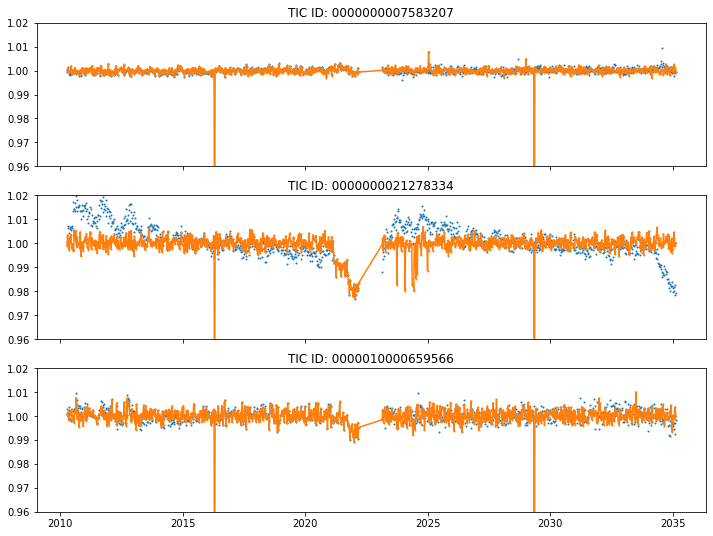

In [96]:
fig, axs = plt.subplots( nrows=3, ncols=1, sharex=True, figsize=(12,9))
for ax, tic in zip(axs, light_curves):
    ax.plot(light_curves[tic].TIME, light_curves[tic].SAP_FLUX, ls='None', marker='.', ms=2)
    ax.plot(light_curves[tic].TIME, light_curves[tic].KSPSAP_FLUX, ls='-', marker='.', ms=2)
    ax.set_ylim(0.96, 1.02)
    ax.set_title(f'TIC ID: {tic}')

In [97]:
toi_catalog.head()

,Parameter Source Pipeline,Detection Pipeline(s),Full TOI ID,TOI Disposition,TIC Right Ascension,TIC Declination,TIC Right Ascension 2015.5,TIC Declination 2015.5,TMag Value,TMag Uncertainty,...,Centroid Offset,TFOP Master,TFOP SG1a,TFOP SG1b,TFOP SG2,TFOP SG3,TFOP SG4,TFOP SG5,Alerted,Updated
TIC_ID,,,,,,,,,,,,,,,,,,,,,
311736478,qlp-s38-faintsearch,QLP,4979.01,PC,181.475977,-71.586180,181.475721,-71.586160,10.589,0.006,...,False,3,4,3,3,4,4,4,2021-12-21 22:38:17+00,2021-12-21 17:29:13+00
145204443,qlp-s38-faintsearch,QLP,4978.01,PC,229.973330,-45.717982,229.973280,-45.718000,12.291,0.008,...,False,3,4,3,3,4,4,4,2021-12-21 22:38:16+00,2021-12-21 17:28:43+00
68081952,qlp-s38-faintsearch,QLP,4977.01,PC,193.461044,-54.346024,193.460711,-54.345963,12.516,0.006,...,False,3,4,3,3,4,4,4,2021-12-21 22:38:16+00,2021-12-21 17:31:03+00
210629725,qlp-s38-faintsearch,QLP,4976.01,PC,212.707849,-54.297538,212.707830,-54.297540,13.367,0.007,...,False,3,4,3,3,4,4,4,2021-12-21 22:38:16+00,2021-12-21 17:27:36+00
304085024,qlp-s38-faintsearch,QLP,4975.01,PC,141.051368,-67.683748,141.051186,-67.683704,13.217,0.009,...,False,3,4,3,3,4,4,4,2021-12-21 22:38:15+00,2021-12-21 17:27:00+00
